# <font color='teal'> Introduction to Neural Networks and Pytorch </font>

    Notebook version: 0.1 (Nov 14, 2020)

    Authors: Jerónimo Arenas García (jarenas@ing.uc3m.es)

    Changes: v.0.1. (Nov 14, 2020) - First version

In [254]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

size=18
params = {'legend.fontsize': 'Large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75}
plt.rcParams.update(params)

## <font color='teal'> 1. Introduction and purpose of this Notebook </font>

### <font color='teal'> 1.1. About Neural Networks </font>

* Neural Networks (NN) have become the state of the art for many machine learning problems
    * Natural Language Processing
    * Computer Vision
    * Image Recognition


* They are in widespread use for many applications, e.g.,
    * Language Translantion (<a href="https://arxiv.org/pdf/1609.08144.pdf">Google Neural Machine Translation System</a>) 
    * Automatic Speech recognition (<a href="https://machinelearning.apple.com/research/hey-siri">Hey Siri!</a> DNN overview)
    * Autonomous Navigation (<a href="https://venturebeat.com/2020/04/13/facebooks-ai-teaches-robots-to-navigate-environments-using-less-data/">Facebook Robot Autonomous 3D Navigation</a>)
    * Automatic Plate recognition
    
<img src="figures/ComputerVision.png" />
    

Feed Forward Neural Networks have been around since 1960 but only recently (last 10-12 years) have they met their expectations, and improve other machine learning algorithms

* Computation resources are now available at large scale
* Cloud Computing (AWS, Azure)
* From MultiLayer Perceptrons to Deep Learning
* Big Data sets
* This has also made possible an intense research effort resulting in
    * Topologies better suited to particular problems (CNNs, RNNs)
    * New training strategies providing better generalization

In parallel, Deep Learning Platforms have emerged that make design, implementation, training, and production of DNNs feasible for everyone

### <font color='teal'> 1.2. Scope</font>

* To provide just an overview of most important NNs and DNNs concepts
* Connecting with already studied methods as starting point
* Introduction to PyTorch
* Providing links to external sources for further study

### <font color='teal'> 1.3. Outline</font>

1. Introduction and purpose of this Notebook
2. Introduction to Neural Networks
3. Implementing Deep Networks with PyTorch

### <font color='teal'> 1.4. Other resources </font>

* We point here to external resources and tutorials that are excellent material for further study of the topic
* Most of them include examples and exercises using numpy and PyTorch
* This notebook uses examples and other material from some of these sources

|Tutorial|Description|
|-----|---------------------|
|<a href="https://www.simplilearn.com/tutorials/deep-learning-tutorial"> <img src="figures/simplilearn.png" width="100"/> </a>|Very general tutorial including videos and an overview of top deep learning platforms|
|<a href="http://d2l.ai/"> <img src="figures/dl2ai.png" width="100"/> </a>|Very complete book with a lot of theory and examples for MxNET, PyTorch, and TensorFlow|
|<a href="https://pytorch.org/tutorials/"> <img src="figures/PyTorch.png" width="100"/> </a>|Official tutorials from the PyTorch project. Contains a 60 min overview, and a very practical *learning PyTorch with examples* tutorial|
|<a href="https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners"> <img src="figures/kaggle.png" width="100"/> </a>|Kaggle tutorials covering an introduction to Neural Networks using Numpy, and a second one offering a PyTorch tutorial|






In addition to this, PyTorch MOOCs can be followed for free in main sites: edX, Coursera, Udacity

## <font color='teal'> 2. Introduction to Neural Networks </font>

In this section, we will implement neural networks from scratch using Numpy arrays

* No need to learn any new Python libraries
* But we need to deal with complexity of multilayer networks
* Low-level implementation will be useful to grasp the most important concepts concerning DNNs
    * Back-propagation
    * Activation functions
    * Loss functions
    * Optimization methods
    * Generalization
    * Special layers and configurations

### <font color='teal'> 2.0. Data preparation </font>

We start by loading some data sets that will be used to carry out the exercises

### <font color='olive'>Sign language digits data set</font>

* Dataset is taken from <a href="https://www.kaggle.com/ardamavi/sign-language-digits-dataset"> Kaggle</a> and used in the above referred tutorial
* 2062 digits in sign language. $64 \times 64$ images
* Problem with 10 classes. One hot encoding for the label matrix
* Input data are images, we create also a flattened version

Size of Input Data Matrix: (2062, 64, 64)
Size of Flattned Input Data Matrix: (2062, 4096)
Size of label Data Matrix: (2062, 10)


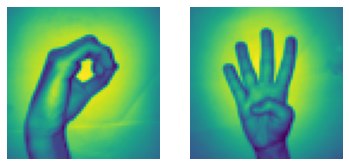

Labels corresponding to figures: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [40]:
digitsX = np.load('./data/Sign-language-digits-dataset/X.npy')
digitsY = np.load('./data/Sign-language-digits-dataset/Y.npy')
K = digitsX.shape[0]
img_size = digitsX.shape[1]
digitsX_flatten = digitsX.reshape(K,img_size*img_size)

print('Size of Input Data Matrix:', digitsX.shape)
print('Size of Flattned Input Data Matrix:', digitsX_flatten.shape)
print('Size of label Data Matrix:', digitsY.shape)
selected = [260, 1400]
plt.subplot(1, 2, 1), plt.imshow(digitsX[selected[0]].reshape(img_size, img_size)), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(digitsX[selected[1]].reshape(img_size, img_size)), plt.axis('off')
plt.show()
print('Labels corresponding to figures:', digitsY[selected,])

### <font color='olive'>Dogs vs Cats data set</font>

* Dataset is taken from <a href="https://www.kaggle.com/c/dogs-vs-cats"> Kaggle</a>
* 25000 pictures of dogs and cats
* Binary problem
* Input data are images, we create also a flattened version
* Original images are RGB, and arbitrary size
* Preprocessed images are $64 \times 64$ and gray scale

In [26]:
# Preprocessing of original Dogs and Cats Pictures
# Adapted from https://medium.com/@mrgarg.rajat/kaggle-dogs-vs-cats-challenge-complete-step-by-step-guide-part-1-a347194e55b1
# RGB channels are collapsed in GRAYSCALE
# Images are resampled to 64x64

"""
import os, cv2  # cv2 -- OpenCV

train_dir = './data/DogsCats/train/'
rows = 64
cols = 64
train_images = sorted([train_dir+i for i in os.listdir(train_dir)])

def read_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(image, (rows, cols),interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    m = len(images)
    X = np.ndarray((m, rows, cols), dtype=np.uint8)
    y = np.zeros((m,))
    print("X.shape is {}".format(X.shape))
  
    for i,image_file in enumerate(images) :
        image = read_image(image_file)
        X[i,] = np.squeeze(image.reshape((rows, cols)))
        if 'dog' in image_file.split('/')[-1].lower():
            y[i] = 1
        elif 'cat' in image_file.split('/')[-1].lower():
            y[i] = 0
      
        if i%5000 == 0 :
            print("Proceed {} of {}".format(i, m))
    
    return X,y

X_train, y_train = prep_data(train_images)
np.save('./data/DogsCats/X.npy', X_train)
np.save('./data/DogsCats/Y.npy', y_train)
"""

X.shape is (25000, 64, 64)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000


Size of Input Data Matrix: (25000, 64, 64)
Size of Flattned Input Data Matrix: (25000, 4096)
Size of label Data Matrix: (25000,)


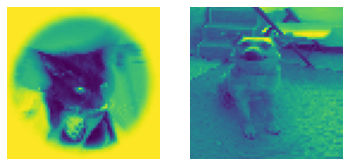

Labels corresponding to figures: [0. 1.]


In [41]:
DogsCatsX = np.load('./data/DogsCats/X.npy')
DogsCatsY = np.load('./data/DogsCats/Y.npy')
K = DogsCatsX.shape[0]
img_size = DogsCatsX.shape[1]
DogsCatsX_flatten = DogsCatsX.reshape(K,img_size*img_size)

print('Size of Input Data Matrix:', DogsCatsX.shape)
print('Size of Flattned Input Data Matrix:', DogsCatsX_flatten.shape)
print('Size of label Data Matrix:', DogsCatsY.shape)
selected = [260, 16000]
plt.subplot(1, 2, 1), plt.imshow(DogsCatsX[selected[0]].reshape(img_size, img_size)), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(DogsCatsX[selected[1]].reshape(img_size, img_size)), plt.axis('off')
plt.show()
print('Labels corresponding to figures:', DogsCatsY[selected,])

### <font color='teal'> 2.1. Logistic Regression as a Simple Neural Network </font>

* We can consider logistic regression as an extremely simple (1 layer) neural network

<img src="figures/LR_network.png" width="700"/>

* In this context, $\text{NLL}({\bf w})$ is normally referred to as cross-entropy loss


* We need to find parameters $\bf w$ and $b$ to minimize the loss $\rightarrow$ GD / SGD
* Gradient computation can be simplified using the **<font color='navy'>chain rule</font>**

<br>
\begin{align}
\frac{\partial \text{NLL}}{\partial {\bf w}} & = \frac{\partial \text{NLL}}{\partial {\hat y}} \cdot \frac{\partial \hat y}{\partial o} \cdot \frac{\partial o}{\partial {\bf w}} \\
& = \sum_{k=0}^{K-1} \left[\frac{1 - y_k}{1 - \hat y_k} - \frac{y_k}{\hat y_k}\right]\hat y_k (1-\hat y_k) {\bf x}_k \\
& = \sum_{k=0}^{K-1} \left[(1 - y_k) \hat y_k - y_k (1 - \hat y_k) \right] {\bf x}_k \\
\frac{\partial \text{NLL}}{\partial b} & = \sum_{k=0}^{K-1} \left[(1 - y_k) \hat y_k - y_k (1 - \hat y_k) \right]
\end{align}

* Gradient Descent Optimization

<br>
$${\bf w}_{n+1} = {\bf w}_n + \rho_n \sum_{k=0}^{K-1} \left[y_k (1 - \hat y_k) - (1 - y_k) \hat y_k \right] {\bf x}_k = {\bf w}_n + \rho_n \sum_{k=0}^{K-1} (y_k - \hat y_k){\bf x}_k$$
$$b_{n+1} = b_n + \rho_n \sum_{k=0}^{K-1} \left[y_k (1 - \hat y_k) - (1 - y_k) \hat y_k \right] = b_n + \rho_n \sum_{k=0}^{K-1} (y_k - \hat y_k)$$

In [240]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#dataset = 'DogsCats'
dataset = 'digits'

if dataset=='DogsCats':
    X = DogsCatsX_flatten
    y = DogsCatsY
    
else:
    #Zero and Ones are one hot encoded in columns 1 and 4
    X0 = digitsX_flatten[np.argmax(digitsY, axis=1)==1,]
    X1 = digitsX_flatten[np.argmax(digitsY, axis=1)==4,]
    X = np.vstack((X0, X1))
    y = np.zeros(X.shape[0])
    y[X0.shape[0]:] = 1
    
#Joint normalization of all data. For images [-.5, .5] scaling is frequent
min_max_scaler = MinMaxScaler(feature_range=(-.5, .5))
X = min_max_scaler.fit_transform(X)

#Generate train and validation data, shuffle
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [241]:
# Define some useful functions
def logistic(t):
    return 1.0 / (1 + np.exp(-t))

def forward(w,b,x):
    #Calcula la salida de la red
    return logistic(x.dot(w)+b)

def backward(y,y_hat,x):
    #Calcula los gradientes
    #w_grad = x.T.dot((1-y)*y_hat - y*(1-y_hat))/len(y)
    #b_grad = np.sum((1-y)*y_hat - y*(1-y_hat))/len(y)
    w_grad = x.T.dot(y_hat-y)/len(y)
    b_grad = np.sum(y_hat-y)/len(y)
    return w_grad, b_grad
    
def accuracy(y, y_hat):
    return np.mean(y == (y_hat>=0.5))

def loss(y, y_hat):
    return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)

In [262]:
#Neural Network Training

niter = 50
rho = .05 #Use this setting for Sign Digits Dataset

#Parameter initialization
w = .1 * np.random.randn(X.shape[1])
b = .1 * np.random.randn(1)

loss_train = np.zeros(niter)
loss_val = np.zeros(niter)
acc_train = np.zeros(niter)
acc_val = np.zeros(niter)

for iter in np.arange(niter):
    y_hat_train = forward(w, b, X_train)
    y_hat_val = forward(w, b, X_val)
    w_grad, b_grad = backward(y_train, y_hat_train, X_train)
    w = w - rho * w_grad
    b = b - rho * b_grad
    
    loss_train[iter] = loss(y_train, y_hat_train)
    loss_val[iter] = loss(y_val, y_hat_val)
    acc_train[iter] = accuracy(y_train, y_hat_train)
    acc_val[iter] = accuracy(y_val, y_hat_val)

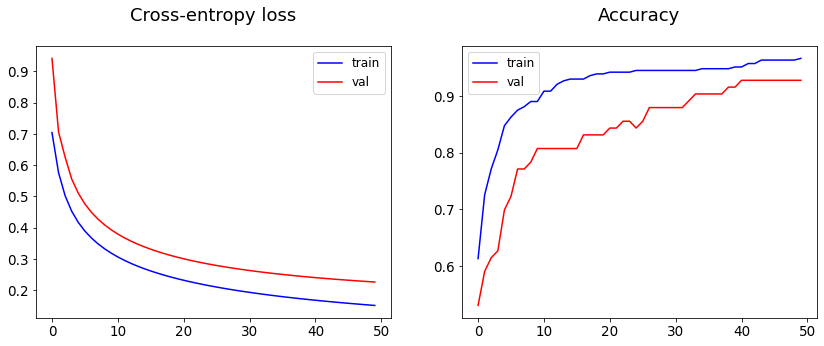

In [264]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1), plt.plot(loss_train, 'b'), plt.plot(loss_val, 'r'), plt.legend(['train', 'val']), plt.title('Cross-entropy loss')
plt.subplot(1, 2, 2), plt.plot(acc_train, 'b'), plt.plot(acc_val, 'r'), plt.legend(['train', 'val']), plt.title('Accuracy')
plt.show()

### <font color='olive'>Exercise</font>

* Study the behavior of the algorithm changing the number of iterations and the learning rate

* Repeat the analysis for the other dataset, trying to obtain as large an accuracy value as possible

* What do you believe are the reasons for the very different performance for both datasets?

Linear logistic regression allowed us to review a few concepts that are key for Neural Networks:

* Network topology (In this case, a linear network with one layer)
* Activation functions
* Parametric approach ($\bf w$/$b$)
* Parameter initialization
* Obtaining the network prediction using *forward* computation
* Loss function
* Parameter gradient calculus using *backward* computation
* Optimization method for parameters update (here, GD)

### <font color='teal'> 2.2. (Multiclass) SoftMax Regression </font>

* One hot encoding output, e.g., $[0, 1, 0, 0]$, $[0, 0, 0, 1]$
* Used to encode categorial variables without predefined order
* Similar to logistic regression, network tries to predict class probability
$$\hat y_{k,j} = \hat P(y_k=j|{\bf x}_k)$$
* Network output should satisfy "probability constraints"
$$\hat y_{k,j} \in [0,1]\qquad \text{and} \qquad \sum_j \hat y_{k,j} = 1$$

* Softmax regression network topology:
<img src="figures/SR_network.png" width="700"/>

### <font color='olive'>Notation</font>

In this section, it is important to pay attention to subindexes:

|Notation/ Variable Name|Definition|
|-----------------------|---------------------------------|
|$y_k \in [0,\dots,M-1]$|The label of pattern $k$|
|${\bf y}_k$|One hot encoding of the label of pattern $k$|
|$y_{k,m}$|$m$-th component of vector ${\bf y}_k$|
|$y_{m}$|$m$-th component of generic vector ${\bf y}$ (i.e., for an undefined pattern)|
|$\hat {\bf y}_k$|Network output for pattern $k$|
|$\hat y_{k,m}$|$m$-th network output for pattern $k$|
|$\hat y_{m}$|$m$-th network output for an undefined pattern)|
|$k$|Index used for pattern enumeration|
|$m$|Index used for network output enumeration|
|$j$|Secondary index for selected network output|





### <font color='olive'>The softmax function</font>

* It is to multiclass problems as the logistic function for binary classification
* Invented in 1959 by the social scientist R. Duncan Luce
* Transforms a set of $M$ real numbers to satisfy "probability" constraints

<br>
$${\bf \hat y} = \text{softmax}({\bf o}) \qquad \text{where} \qquad \hat y_j = \frac{\exp(o_j)}{\sum_m \exp(o_m)} $$

* Continuous and **<font color="navy">differentiable</font>** function

<br>
$$\frac{\partial \hat y_j}{\partial o_j} = \hat y_j (1 - \hat y_j) \qquad \text{and} \qquad \frac{\partial \hat y_j}{\partial o_m} = - \hat y_j \hat y_m$$



* The classifier is still linear, since

<br>
$$\arg\max \hat {\bf y} = \arg\max \hat {\bf o} = \arg\max {\bf W} {\bf x} + {\bf b}$$

### <font color='olive'>Cross-entropy loss for multiclass problems</font>

* Similarly to logistic regression, minimization of the log-likelihood can be stated to obtain ${\bf W}$ and ${\bf b}$

<br>
$$\text{Binary}: \text{NLL}({\bf w}, b) = - \sum_{k=0}^{K-1} \log \hat P(y_k|{\bf x}_k)$$
$$\text{Multiclass}: \text{NLL}({\bf W}, {\bf b}) = - \sum_{k=0}^{K-1} \log \hat P(y_k|{\bf x}_k)$$

* Using one hot encoding for the label vector of each sample, i.e., $y_k = 3 \rightarrow {\bf y}_k = [0, 0, 1, 0]$

$$\text{NLL}({\bf W}, {\bf b}) = - \sum_{k=0}^{K-1} \sum_{m=0}^{M-1} y_{k,m} \log \hat P(m|{\bf x}_k)= - \sum_{k=0}^{K-1} \sum_{m=0}^{M-1} y_{k,m} \log \hat y_{k,m} = \sum_{k=0}^{K-1} l({\bf y}_k, \hat {\bf y}_k)$$

* Note that for each pattern, only one element in the sum is non-zero

* In the context of Neural Networks, this cost is referred to as the cross-entropy loss

<br>
$$l({\bf y}, \hat {\bf y}) = - \sum_{m=0}^{M-1} y_{m} \log \hat y_{m}$$

### <font color='olive'>Network optimization</font>

* Gradient Descent Optimization

<br>
$${\bf W}_{n+1} = {\bf W}_n - \rho_n \sum_{k=0}^{K-1} \frac{\partial l({\bf y}_k,{\hat {\bf y}_k})}{\partial {\bf W}}$$
$${\bf b}_{n+1} = {\bf b}_n - \rho_n \sum_{k=0}^{K-1} \frac{\partial l({\bf y}_k,{\hat {\bf y}_k})}{\partial {\bf b}}$$

* We compute derivatives using the chain rule (we ignore dimension mismatchs, and rearrange at the end)

<br>
\begin{align}
\frac{\partial l({\bf y},{\hat {\bf y}})}{\partial {\bf W}} &= \frac{\partial l({\bf y},{\hat {\bf y}})}{\partial \hat {\bf y}} \cdot \frac{\partial \hat {\bf y}}{\partial {\bf o}} \cdot \frac{\partial {\bf o}}{\partial {\bf W}} \\ & = \left[\begin{array}{c} 0 \\ 0 \\ \vdots \\ - 1/\hat y_j \\ \vdots \end{array}\right] \left[ \begin{array}{ccccc} \hat y_1 (1 - \hat y_1) & -\hat y_1 \hat y_2 & \dots & -\hat y_1 \hat y_j & \dots \\ -\hat y_2 \hat y_1 & \hat y_2 (1 - \hat y_2) & \dots & -\hat y_2 \hat y_j & \dots \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ - \hat y_j \hat y_1 & -\hat y_j \hat y_2 & \dots & \hat y_j (1-\hat y_j) & \dots \\ \vdots & \vdots & \ddots & \vdots & \vdots \end{array}\right] {\bf x}^\top \\
& = \left[\begin{array}{c}\hat y_1 \\ \hat y_2 \\ \vdots \\ \hat y_j - 1 \\ \vdots \end{array} \right] {\bf x}^\top \\
& = (\hat {\bf y} - {\bf y}){\bf x}^\top \\
\\
\frac{\partial l({\bf y},{\hat {\bf y}})}{\partial {\bf b}} & = (\hat {\bf y} - {\bf y}){\bf 1}^\top
\end{align}

In [266]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dataset = 'digits'

#Joint normalization of all data. For images [-.5, .5] scaling is frequent
min_max_scaler = MinMaxScaler(feature_range=(-.5, .5))
X = min_max_scaler.fit_transform(digitsX_flatten)

#Generate train and validation data, shuffle
X_train, X_val, y_train, y_val = train_test_split(X, digitsY, test_size=0.2, random_state=42, shuffle=True)

In [359]:
# Define some useful functions
def softmax(t):
    """Compute softmax values for each sets of scores in t."""
    e_t = np.exp(t)
    return e_t / e_t.sum(axis=1)[:,np.newaxis]

def forward(w,b,x):
    #Calcula la salida de la red
    return softmax(x.dot(w.T)+b.T)

def backward(y,y_hat,x):
    #Calcula los gradientes
    W_grad = (y_hat-y).T.dot(x)/len(y)
    b_grad = ((y_hat-y).sum(axis=0)[:,np.newaxis])/len(y)
    return W_grad, b_grad
    
def accuracy(y, y_hat):
    return np.mean(np.argmax(y, axis=1) == np.argmax(y_hat, axis=1))

def loss(y, y_hat):
    return -np.sum(y * np.log(y_hat))/len(y)

In [379]:
#Neural Network Training

niter = 300
rho = .1

#Parameter initialization
W = .1 * np.random.randn(y_train.shape[1], X_train.shape[1])
b = .1 * np.random.randn(y_train.shape[1],1)

loss_train = np.zeros(niter)
loss_val = np.zeros(niter)
acc_train = np.zeros(niter)
acc_val = np.zeros(niter)

for iter in np.arange(niter):
    y_hat_train = forward(W, b, X_train)
    y_hat_val = forward(W, b, X_val)
    W_grad, b_grad = backward(y_train, y_hat_train, X_train)
    W = W - rho * W_grad
    b = b - rho * b_grad
    
    loss_train[iter] = loss(y_train, y_hat_train)
    loss_val[iter] = loss(y_val, y_hat_val)
    acc_train[iter] = accuracy(y_train, y_hat_train)
    acc_val[iter] = accuracy(y_val, y_hat_val)

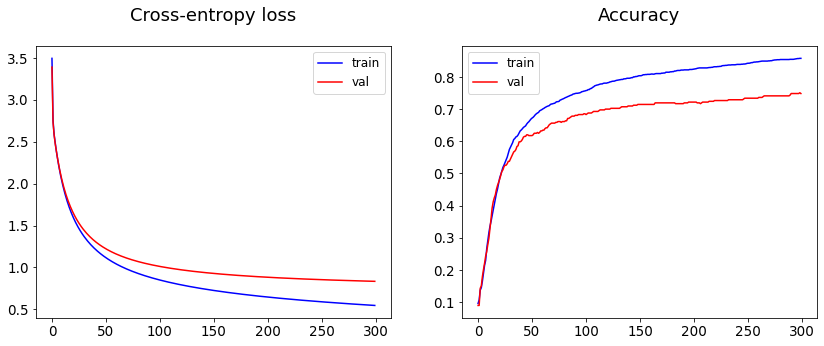

In [380]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1), plt.plot(loss_train, 'b'), plt.plot(loss_val, 'r'), plt.legend(['train', 'val']), plt.title('Cross-entropy loss')
plt.subplot(1, 2, 2), plt.plot(acc_train, 'b'), plt.plot(acc_val, 'r'), plt.legend(['train', 'val']), plt.title('Accuracy')
plt.show()

### <font color='olive'>Exercise</font>

* Study the behavior of the algorithm changing the number of iterations and the learning rate

* Obtain the confusion matrix, and study which classes are more difficult to classify

* Think about the differences between using this 10-class network, vs training 10 binary classifiers, one for each class

As in linear logistic regression note that we covered the following aspects of neural network design, implementation, and training:

* Network topology (In this case, a linear network with one layer and $M$ ouptuts)
* Activation functions (softmax activation)
* Parameter initialization ($\bf W$/$b$)
* Obtaining the network prediction using *forward* computation
* Loss function
* Parameter gradient calculus using *backward* computation
* Optimization method for parameters update (here, GD)

### <font color='teal'> 2.3. Multi Layer Networks (Deep Networks) </font>

Previous networks are constrained in the sense that they can only implement linear classifiers. In this section we analyze how we can extend them to implement non-linear classification:
* Fixed non-linear transformations of inputs: ${\bf z} = {\bf{f}}({\bf x})$

* Parametrize the transformation using additional non-linear layers
<img src="figures/LR_MLPnetwork.png" width="650"/>

* When counting layers, we normally ignore the input layer, since there is no computation involved
* Intermediate layers are normally referred to as "hidden" layers
* Non-linear activations result in an overall non-linear classifier
* We can still use Gradient Descent Optimization as long as the network loss derivatives with respect to all parameters exist and are continuous
* This is already deep learning. We can have two layers or more, each with different numbers of neurons. But as long as derivatives with respect to parameters can be calculated, the network can be optimized
* Finding an appropriate number of layers for a particular problem, as well as the number of neuros per layer, require exploration
* The more data we have for training the network, the more parameters we can afford, making feasible the use of more complex topologies

### <font color='olive'>Example: 2-layer network for binary classification</font>

* Network topology
    * Hidden layer with $n_h$ neurons
    * Hyperbolic tangent activation function for the hidden layer
    $${\bf h} = \text{tanh}({\bf o}^{(1)})= \text{tanh}\left({\bf W}^{(1)} {\bf x} + {\bf b}^{(1)}\right)$$
    * Output layer is linear with logistic activation (as in logistic regression)
    $$\hat y = \text{logistic}(o) = \text{logistic}\left({{\bf w}^{(2)}}^\top {\bf h} + b^{(2)}\right)$$
    
* Cross-entropy loss

$$l(y,\hat y) = -\left[ y \log(\hat y) + (1 - y ) \log(1 - \hat y) \right], \qquad \text{with } y\in [0,1]$$

* Update of output layer weights as in logistic regression (use ${\bf h}$ instead of ${\bf x}$)

$${\bf w}_{n+1}^{(2)} = {\bf w}_n^{(2)} + \rho_n \sum_{k=0}^{K-1} (y_k - \hat y_k){\bf h}_k$$
$$b_{n+1}^{(2)} = b_n^{(2)} + \rho_n \sum_{k=0}^{K-1} (y_k - \hat y_k)$$

<img src="figures/forward_graph.png" width="500"/>

* For updating the input layer parameters we need to use the chain rule (we ignore dimensions and rearrange at the end)

\begin{align}\frac{\partial l(y, \hat y)}{\partial {\bf W}^{(1)}} & = \frac{\partial l(y, \hat y)}{\partial o} \cdot \frac{\partial o}{\partial {\bf h}} \cdot \frac{\partial {\bf h}}{\partial {\bf o}^{(1)}} \cdot \frac{\partial {\bf o}^{(1)}}{\partial {\bf W}^{(1)}} \\
& = (\hat y - y) [{\bf w}^{(2)} .\ast ({\bf 1}-{\bf h})^2] {\bf x}^{\top}
\end{align}

\begin{align}\frac{\partial l(y, \hat y)}{\partial {\bf b}^{(1)}} & = \frac{\partial l(y, \hat y)}{\partial o} \cdot \frac{\partial o}{\partial {\bf h}} \cdot \frac{\partial {\bf h}}{\partial {\bf o}^{(1)}} \cdot \frac{\partial {\bf o}^{(1)}}{\partial {\bf b}^{(1)}} \\
& = (\hat y - y) [{\bf w}^{(2)} .\ast ({\bf 1}-{\bf h})^2]
\end{align}

* GD update rules become
$${\bf W}_{n+1}^{(1)} = {\bf W}_n^{(1)} + \rho_n \sum_{k=0}^{K-1} (y_k - \hat y_k)[{\bf w}^{(2)} .\ast ({\bf 1}-{\bf h}_k)^2] {\bf x}_k^{\top}$$
$${\bf b}_{n+1}^{(1)} = {\bf b}_n^{(1)} + \rho_n \sum_{k=0}^{K-1} (y_k - \hat y_k)[{\bf w}^{(2)} .\ast ({\bf 1}-{\bf h}_k)^2]$$


<img src="figures/forward_graph.png" width="500"/>

* The process can be implemented as long as the derivatives of the network overall loss with respect to parameters can be computed

* Forward computation graphs represent how the network output can be computed

* We can then reverse the graph to compute derivatives with respect to parameters

* Deep Learning libraries implement automatic gradient camputation
   * We just define network topology
   * Computation of gradients is carried out automatically

In [477]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#dataset = 'DogsCats'
dataset = 'digits'

if dataset=='DogsCats':
    X = DogsCatsX_flatten
    y = DogsCatsY
    
else:
    #Zero and Ones are one hot encoded in columns 1 and 4
    X0 = digitsX_flatten[np.argmax(digitsY, axis=1)==1,]
    X1 = digitsX_flatten[np.argmax(digitsY, axis=1)==4,]
    X = np.vstack((X0, X1))
    y = np.zeros(X.shape[0])
    y[X0.shape[0]:] = 1
    
#Joint normalization of all data. For images [-.5, .5] scaling is frequent
min_max_scaler = MinMaxScaler(feature_range=(-.5, .5))
X = min_max_scaler.fit_transform(X)

#Generate train and validation data, shuffle
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [447]:
# Define some useful functions
def logistic(t):
    return 1.0 / (1 + np.exp(-t))

def forward(W1,b1,w2,b2,x):
    #Calcula la salida de la red
    h = x.dot(W1.T)+b1
    y_hat = logistic(h.dot(w2)+b2)
    #Provide also hidden units value for backward gradient step
    return h, y_hat

def backward(y,y_hat,h,x,w2):
    #Calcula los gradientes
    w2_grad = h.T.dot(y_hat-y)/len(y)
    b2_grad = np.sum(y_hat-y)/len(y)
    W1_grad = ((w2[np.newaxis,]*((1-h)**2)*(y_hat - y)[:,np.newaxis]).T.dot(x))/len(y)
    b1_grad = ((w2[np.newaxis,]*((1-h)**2)*(y_hat - y)[:,np.newaxis]).sum(axis=0))/len(y)
    return w2_grad, b2_grad, W1_grad, b1_grad
    
def accuracy(y, y_hat):
    return np.mean(y == (y_hat>=0.5))

def loss(y, y_hat):
    return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)

In [ ]:
#Neural Network Training
niter = 10000
rho = .001

#Parameter initialization
n_h = 5
W1 = .01 * np.random.randn(n_h, X_train.shape[1])
b1 = .01 * np.random.randn(n_h)
w2 = .01 * np.random.randn(n_h)
b2 = .01 * np.random.randn(1)

loss_train = np.zeros(niter)
loss_val = np.zeros(niter)
acc_train = np.zeros(niter)
acc_val = np.zeros(niter)

for iter in np.arange(niter):
    h, y_hat_train = forward(W1, b1, w2, b2, X_train)
    dum, y_hat_val = forward(W1, b1, w2, b2, X_val)
    w2_grad, b2_grad, W1_grad, b1_grad = backward(y_train, y_hat_train, h, X_train, w2)
    W1 = W1 - rho/10 * W1_grad
    b1 = b1 - rho/10 * b1_grad
    w2 = w2 - rho * w2_grad
    b2 = b2 - rho * b2_grad
    
    loss_train[iter] = loss(y_train, y_hat_train)
    loss_val[iter] = loss(y_val, y_hat_val)
    acc_train[iter] = accuracy(y_train, y_hat_train)
    acc_val[iter] = accuracy(y_val, y_hat_val)
    
    if not ((iter+1)%(niter/5)):
        print('Número de iteraciones:', iter+1)

### <font color='olive'>Results in Dogs vs Cats dataset ($niter = 1000$ and $\rho = 0.1$)</font>

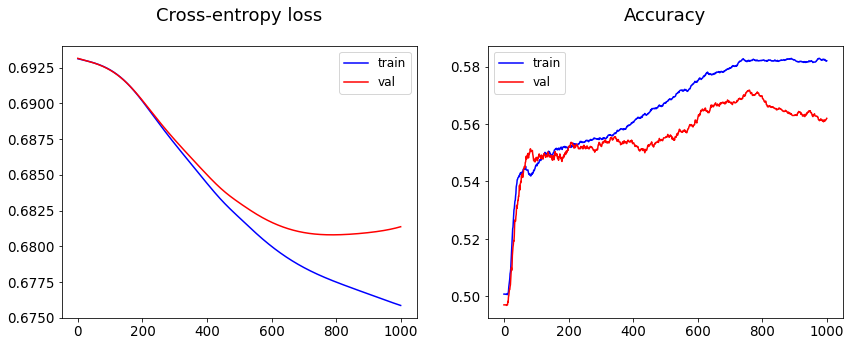

In [476]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1), plt.plot(loss_train, 'b'), plt.plot(loss_val, 'r'), plt.legend(['train', 'val']), plt.title('Cross-entropy loss')
plt.subplot(1, 2, 2), plt.plot(acc_train, 'b'), plt.plot(acc_val, 'r'), plt.legend(['train', 'val']), plt.title('Accuracy')
plt.show()

### <font color='olive'>Results in Binary Sign Digits Dataset ($niter = 10000$ and $\rho = 0.001$)</font>

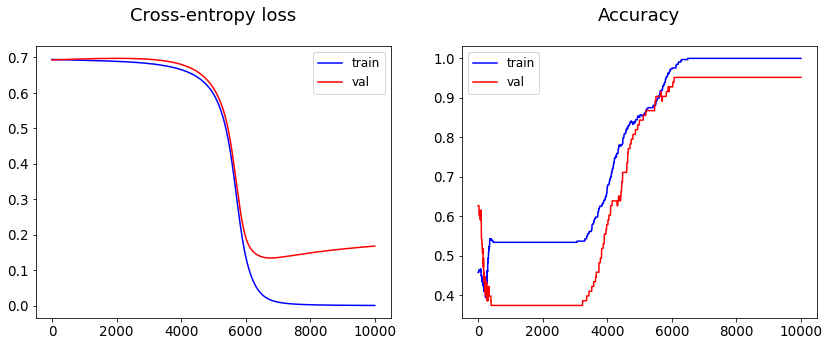

In [479]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1), plt.plot(loss_train, 'b'), plt.plot(loss_val, 'r'), plt.legend(['train', 'val']), plt.title('Cross-entropy loss')
plt.subplot(1, 2, 2), plt.plot(acc_train, 'b'), plt.plot(acc_val, 'r'), plt.legend(['train', 'val']), plt.title('Accuracy')
plt.show()

### <font color='olive'>Exercises</font>

* Train the network using other settings for:
    * The number of iterations
    * The learning step
    * The number of neurons in the hidden layer
   
* You may find divergence issues for some settings
    * Related to the use of the hyperbolic tangent function in the hidden layer (numerical issues)
    * This is also why learning step was selected smaller for the hidden layer
    * Optimized libraries rely on certain modifications to obtain more robust implementations
    
* Try to solve both problems using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">scikit-learn implementation</a>
    * You can also explore other activation functions
    * You can also explore other solvers to speed up convergence
    * You can also adjust the size of minibatches
    * Take a look at the *early_stopping* parameter

### <font color='teal'> 2.4. Multi Layer Networks for Regression </font>

* Deep Learning networks can be used to solve regression problems with the following common adjustments

    * Linear activation for the output unit
    
    * Square loss: 
    $$l(y, \hat y) = (y - \hat y), \qquad \text{where} \qquad y, \hat y \in \Re$$

### <font color='teal'> 2.5. Activation Functions</font>

You can refer to the <a href="http://d2l.ai/chapter_multilayer-perceptrons/mlp.html#activation-functions">Dive into Deep Learning book</a> for a more detailed discussion on common actiation functions for the hidden units. 

We extract some information about the very important **ReLU** function

> *The most popular choice, due to both simplicity of implementation and its good performance on a variety of predictive tasks, is the rectified linear unit (ReLU). ReLU provides a very simple nonlinear transformation. Given an element $x$, the function is defined as the maximum of that element and 0.*

> *When the input is negative, the derivative of the ReLU function is 0, and when the input is positive, the derivative of the ReLU function is 1. When the input takes value precisely equal to 0, we say that the derivative is 0 when the input is 0.*

> *The reason for using ReLU is that its derivatives are particularly well behaved: either they vanish or they just let the argument through. This makes optimization better behaved and it mitigated the well-documented problem of vanishing gradients that plagued previous versions of neural networks.*

## <font color='teal'> 3. Implementing Deep Networks with PyTorch </font>

### <font color='teal'> 3.0. Installation and PyTorch introduction</font>

* PyTorch is a Python-based library with two goals
    * Provide Numpy-like computation with GPU parallelization support
    * Provide different abstraction levels to simplify the implementation and training of DNNs

* PyTorch can be installed with or without GPU support
    * If you have an Anaconda installation, you can install from the command line, using the <a href="https://pytorch.org/">instructions of the project website</a>
    
* PyTorch is also preinstalled in Google Collab with free GPU access
    * Follow RunTime -> Change runtime type, and select GPU for HW acceleration
    
* Please, refer to Pytorch getting started tutorial for a quick introduction regarding tensor definition, GPU vs CPU storage of tensors, operations, and bridge to Numpy

### <font color='teal'> 3.1. Computation graphs and automatic gradient calculation </font>

### <font color='teal'> 3.2. Activation Functions </font>

### <font color='teal'> 3.3. Optimization </font>

### <font color='teal'> 3.4. Generalization</font>

Common strategies to guarantee good generalization capabilities:

    - Early stopping
    - Data augmentation
    - Dropout

### <font color='teal'> 3.5. Convolutional Networks for Image Processing </font>

Not just image, 2D data in general